In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
import plotly.express as px

In [237]:
orders = pd.read_csv('/Users/trevorban/Downloads/Machine_Learning_Lab/data/Orders.csv')
returns = pd.read_csv('/Users/trevorban/Downloads/Machine_Learning_Lab/data/Returns.csv')

In [238]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

Convert Profit and Sales to float

In [239]:
orders.Profit = orders.Profit.apply(lambda x: x.replace('$',''))
orders.Profit = orders.Profit.apply(lambda x: x.replace(',',''))
orders.Profit = orders.Profit.apply(lambda x: float(x))

In [240]:
orders.Sales = orders.Sales.apply(lambda x: x.replace('$',''))
orders.Sales = orders.Sales.apply(lambda x: x.replace(',',''))
orders.Sales = orders.Sales.apply(lambda x: float(x))

Convert Date to datetime

In [241]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

<AxesSubplot:xlabel='Order.Date', ylabel='Count'>

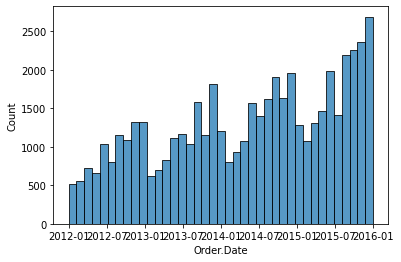

In [242]:
sns.histplot(orders['Order.Date'])

In [243]:
orders.loc[:, 'Month'] = orders['Order.Date'].apply(lambda x: x.month)
orders.loc[:, 'Year'] = orders['Order.Date'].apply(lambda x: x.year)

In [244]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Month,Year
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,11,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,2,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,10,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,1,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,11,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,6,2015
51286,34337,US-2014-ZD21925140-41765,2014-05-06,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,5,2014
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,8,2012
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium,2,2013


In [245]:
fig = px.histogram(orders.Month)
fig.update_layout(bargap=0.2)
fig.show()

In [246]:
monthly = orders.groupby(by = ['Year','Month'])['Sales', 'Quantity', 'Profit'].sum().reset_index()
monthly

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,Month,Sales,Quantity,Profit
0,2012,1,98898.53,1463,8321.76
1,2012,2,103718.01,1401,14323.02
2,2012,3,135746.52,1745,13089.59
3,2012,4,114332.99,1934,13211.11
4,2012,5,158228.35,2167,14644.10
5,2012,6,207571.58,3002,20940.49
6,2012,7,118434.88,1836,4040.56
7,2012,8,208063.31,3020,26452.97
8,2012,9,284587.84,3644,35044.54
9,2012,10,216114.60,2981,27597.90


In [247]:
ship_date_inv = orders[['Ship.Date','Quantity']].sort_values(by = 'Ship.Date')
ship_date_inv.loc[:,'Month'] = ship_date_inv['Ship.Date'].apply(lambda x: int(x[:x.find('/')]))
ship_date_inv.loc[:,'Year']  = ship_date_inv['Ship.Date'].apply(lambda x: x[-2:])

#ship_date_inv.head()

month_quant = ship_date_inv.groupby(by = ['Year','Month']).sum().reset_index()

fig = px.line(data_frame = month_quant.sort_values(by = 'Month'),
              x = 'Month',
              y = 'Quantity',
              color = 'Year',
              title = 'Quantity vs. Month by Year')
fig.show()

In [248]:
ship_date_profit = orders[['Ship.Date','Profit']].sort_values(by = 'Ship.Date')
ship_date_profit.loc[:,'Month'] = ship_date_inv['Ship.Date'].apply(lambda x: int(x[:x.find('/')]))
ship_date_profit.loc[:,'Year']  = ship_date_inv['Ship.Date'].apply(lambda x: x[-2:])

month_prof = ship_date_profit.groupby(by = ['Year','Month']).sum().reset_index()

#month_prof.head()

fig = px.line(data_frame = month_prof.sort_values(by = 'Month'),
              x = 'Month',
              y = 'Profit',
              color = 'Year',
              title = 'Profit vs. Month by Year')
fig.show()

In [249]:
ship_date_sales = orders[['Ship.Date','Sales']].sort_values(by = 'Ship.Date')
ship_date_sales.loc[:,'Month'] = ship_date_inv['Ship.Date'].apply(lambda x: int(x[:x.find('/')]))
ship_date_sales.loc[:,'Year']  = ship_date_inv['Ship.Date'].apply(lambda x: x[-2:])

month_sales = ship_date_sales.groupby(by = ['Year','Month']).sum().reset_index()

#month_prof.head()

fig = px.line(data_frame = month_sales.sort_values(by = 'Month'),
              x = 'Month',
              y = 'Sales',
              color = 'Year',
              title = 'Sales vs. Month by Year')
fig.show()

In [250]:
ship_date_cost = orders[['Ship.Date','Shipping.Cost']].sort_values(by = 'Ship.Date')
ship_date_cost.loc[:,'Month'] = ship_date_inv['Ship.Date'].apply(lambda x: int(x[:x.find('/')]))
ship_date_cost.loc[:,'Year']  = ship_date_inv['Ship.Date'].apply(lambda x: x[-2:])

month_ship_cost = ship_date_cost.groupby(by = ['Year','Month']).sum().reset_index()

#month_prof.head()

fig = px.line(data_frame = month_ship_cost.sort_values(by = 'Month'),
              x = 'Month',
              y = 'Shipping.Cost',
              color = 'Year',
              title = 'Shipping Cost vs. Month by Year')
fig.show()

In [251]:
z = orders.groupby(by='Month')['Month', 'Quantity'].agg({'Quantity': ['sum']})
z = z.reset_index()
z

/Users/trevorban/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Month,Quantity
,,sum
0,1,8872
1,2,7429
2,3,10390
3,4,10466
4,5,13196
5,6,18009
6,7,11046
7,8,17596
8,9,20479


Returns analysis

	1. How much profit did we lose due to returns each year?

In [252]:
merged = returns.merge(orders, how='inner', left_on='Order ID', right_on='Order.ID')

In [253]:
merged.groupby(['Year'])['Sales'].sum()

Year
2012    111935.81
2013     96575.21
2014    133737.41
2015    183683.98
Name: Sales, dtype: float64

	2. How many customer returned more than once? more than 5 times?


In [386]:
return_count = merged.groupby('Customer.ID')['Customer.ID'].count().sort_values()
return_count

Customer.ID
AA-1031558       1
KC-166751408     1
KD-16345144      1
KD-1634518       1
KD-661549        1
                ..
KH-165101404     9
TB-2140066      10
MY-1829582      10
JK-1609027      11
PO-1885082      13
Name: Customer.ID, Length: 1061, dtype: int64

In [389]:
x = 0
for i in range(len(return_count)):
    if return_count[i] > 1:
        x += 1
print(str(x) + ' customers returned more than once')

547 customers returned more than once


In [390]:
x = 0
for i in range(len(return_count)):
    if return_count[i] > 5:
        x += 1
print(str(x) + ' customers returned more than five times')

46 customers returned more than five times


	3. Which regions are more likely to return orders?


In [391]:
orders_regions = pd.DataFrame(orders.groupby('Region')['Order.ID'].count().sort_values()).reset_index()
returns_regions = pd.DataFrame(returns.groupby('Region')['Order ID'].count().sort_values()).reset_index()

In [392]:
merged_returns = returns_regions.merge(orders_regions, how='inner', left_on='Region', right_on='Region')

In [393]:
merged_returns['return_ratio'] = merged_returns['Order ID'] / merged_returns['Order.ID']

In [394]:
merged_returns.sort_values(by='return_ratio', ascending=False)

,Region,Order ID,Order.ID,return_ratio
10,Southern US,44,1620,0.027160
13,Southern Europe,55,2113,0.026029
17,Eastern US,69,2848,0.024228
3,Southern Africa,11,478,0.023013
18,Western US,72,3203,0.022479
19,Oceania,78,3487,0.022369
12,Eastern Asia,53,2374,0.022325
14,Southern Asia,58,2655,0.021846
20,Central America,117,5616,0.020833
21,Western Europe,121,5883,0.020568


	4. Which categories (sub-categories) of products are more likely to be returned?


In [395]:
return_categories = pd.DataFrame(merged.groupby(['Category'])['Order.ID'].count().sort_values(ascending=False))
order_categories = pd.DataFrame(orders.groupby(['Category'])['Order.ID'].count().sort_values(ascending=False))
merged_categories = return_categories.merge(order_categories, on='Category')

In [396]:
merged_categories = return_categories.merge(order_categories, on='Category')

merged_categories['return_ratio'] = merged_categories['Order.ID_x'] / merged_categories['Order.ID_y']
merged_categories.sort_values(by='return_ratio', ascending=False)

,Order.ID_x,Order.ID_y,return_ratio
Category,,,
Technology,445,10141,0.043881
Furniture,427,9860,0.043306
Office Supplies,1348,31289,0.043082


In [397]:
return_subcategories = pd.DataFrame(merged.groupby(['Sub.Category'])['Order.ID'].count().sort_values(ascending=False))
order_subcategories = pd.DataFrame(orders.groupby(['Sub.Category'])['Order.ID'].count().sort_values(ascending=False))
merged_subcategories = return_subcategories.merge(order_subcategories, on='Sub.Category')

In [398]:
merged_subcategories = return_subcategories.merge(order_subcategories, on='Sub.Category')

merged_subcategories['return_ratio'] = merged_subcategories['Order.ID_x'] / merged_subcategories['Order.ID_y']
merged_subcategories.sort_values(by='return_ratio', ascending=False)

,Order.ID_x,Order.ID_y,return_ratio
Sub.Category,,,
Labels,137,2601,0.052672
Tables,41,861,0.047619
Accessories,138,3075,0.044878
Art,217,4864,0.044613
Copiers,99,2223,0.044534
Binders,269,6146,0.043768
Phones,145,3357,0.043193
Bookcases,104,2411,0.043136
Paper,150,3492,0.042955
